# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [174]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [175]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [176]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips[0:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [177]:
modelo = sm.OLS(y, X).fit()
modelo.summary()

C:\Users\alext\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Fri, 07 Apr 2023   Prob (F-statistic):              0.283
Time:                        22:44:34   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1419      0.530     -0.268      0.814      -2.422       2.138
sex[T.Female]     -1.1330      0.871     -1.300      0.323      -4.882       2.617
smoker[T.No]      -0.1419      0.530     -0.268      0.814      -2.422       2.138
time[T.Dinner]    -0.1419      0.530     -0.268      0.814      -2.422       2.138
net_bill           0.2093      0.097      2.163      0.163      -0.207       0.626
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.103
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.454
Skew:                          -0.120   Prob(JB):                        0.797
Kurtosis:                       1.543   Cond. No.                     5.37e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [178]:
y, X = patsy.dmatrices('tip ~ net_bill', tips[0:5])
X

DesignMatrix with shape (5, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)

In [179]:
rvns = sm.OLS(y, X).fit()
rvns.summary()

C:\Users\alext\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2.745
Date:                Fri, 07 Apr 2023   Prob (F-statistic):              0.196
Time:                        22:44:34   Log-Likelihood:                -5.8172
No. Observations:                   5   AIC:                             15.63
Df Residuals:                       3   BIC:                             14.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1878      1.751     -0.107      0.921      -5.762       5.386
net_bill       0.1680      0.101      1.657      0.196      -0.155       0.491
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.379
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.202
Skew:                          -1.200   Prob(JB):                        0.548
Kurtosis:                       2.901   Cond. No.                         67.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        22:44:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

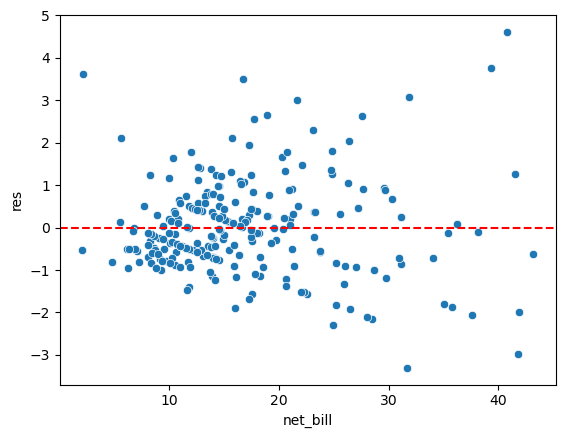

In [180]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
tips['res'] = reg.resid
print(reg.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           4.40e-20
Time:                        22:44:34   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

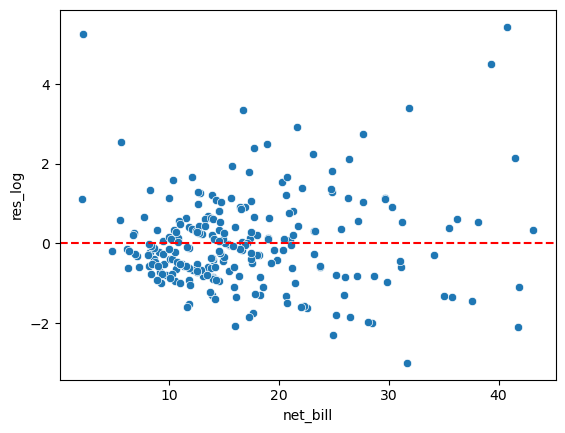

In [181]:
reglog = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
tips['res_log'] = reglog.resid

print(reglog.summary())

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.47e-20
Time:                        22:44:34   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

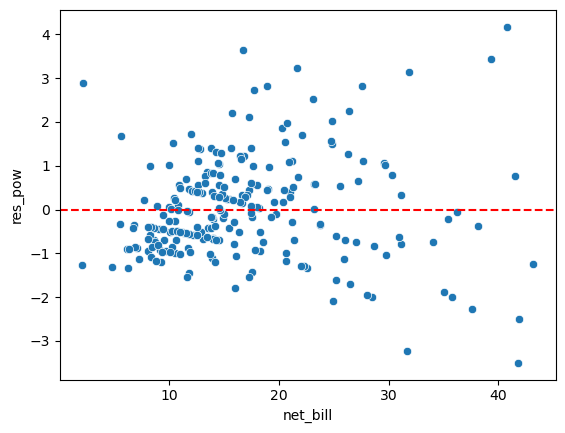

In [182]:
regpow = smf.ols('tip ~ np.power(net_bill, 2)', data = tips).fit()
tips['res_pow'] = regpow.resid

print(regpow.summary())

sns.scatterplot(x = 'net_bill', y = 'res_pow', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O modelo transformado em polinômio apresenta-se aparentemente uma melhor opção, os residuos em gráfico estão apresentando uma evidência menor de padrão e o R² é maior que o modelo transformado em log.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [183]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips[0:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [184]:
model = sm.OLS(y, X).fit()
model.summary()

C:\Users\alext\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     2.111
Date:                Fri, 07 Apr 2023   Prob (F-statistic):              0.321
Time:                        22:44:34   Log-Likelihood:               -0.87820
No. Observations:                   5   AIC:                             7.756
Df Residuals:                       2   BIC:                             6.585
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1494      0.268     -0.557      0.633      -1.303       1.004
sex[T.Female]     -0.6121      0.441     -1.389      0.299      -2.509       1.285
smoker[T.No]      -0.1494      0.268     -0.557      0.633      -1.303       1.004
time[T.Dinner]    -0.1494      0.268     -0.557      0.633      -1.303       1.004
net_bill           0.0924      0.049      1.887      0.200      -0.118       0.303
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.002
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.369
Skew:                          -0.076   Prob(JB):                        0.831
Kurtosis:                       1.677   Cond. No.                     5.37e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.60e-21
Time:                        22:44:34   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

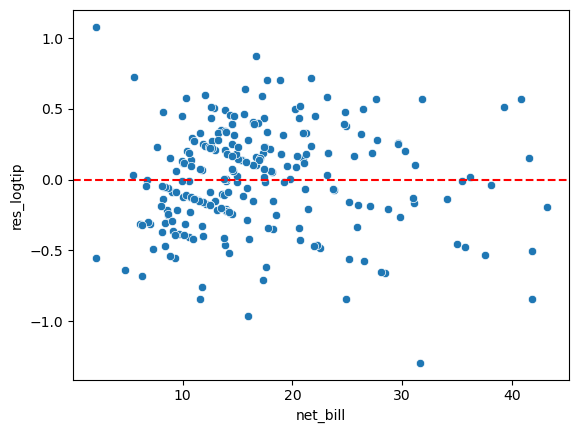

In [185]:
reg_logtip = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
tips['res_logtip'] = reg_logtip.resid

print(reg_logtip.summary())

sns.scatterplot(x = 'net_bill', y = 'res_logtip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.62e-22
Time:                        22:44:34   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

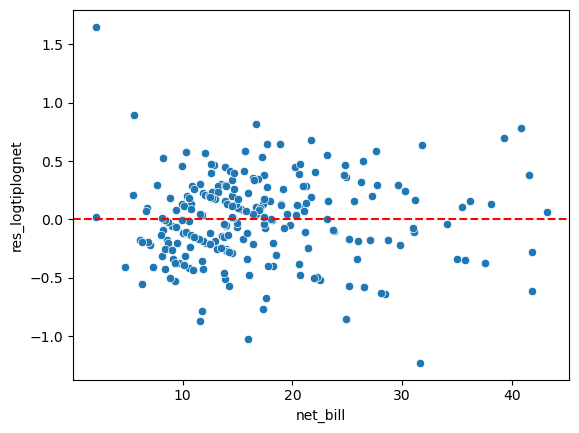

In [186]:
reg_logtiplognet = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()
tips['res_logtiplognet'] = reg_logtiplognet.resid

print(reg_logtiplognet.summary())

sns.scatterplot(x = 'net_bill', y = 'res_logtiplognet', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.62e-22
Time:                        22:44:35   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

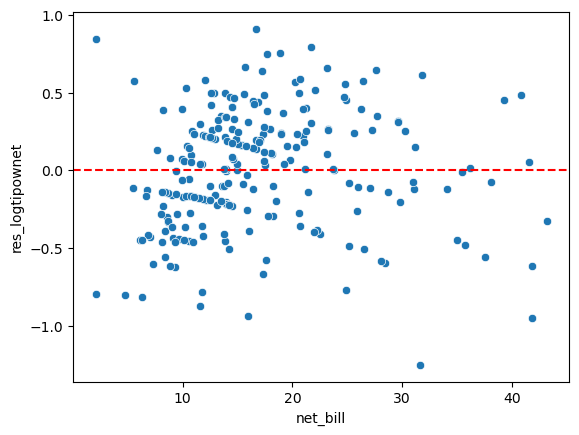

In [187]:
reg_logtipownet = smf.ols('np.log(tip) ~ np.power(net_bill, 2)', data = tips).fit()
tips['res_logtipownet'] = reg_logtipownet.resid

print(reg_logtiplognet.summary())

sns.scatterplot(x = 'net_bill', y = 'res_logtipownet', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.47e-20
Time:                        22:44:35   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

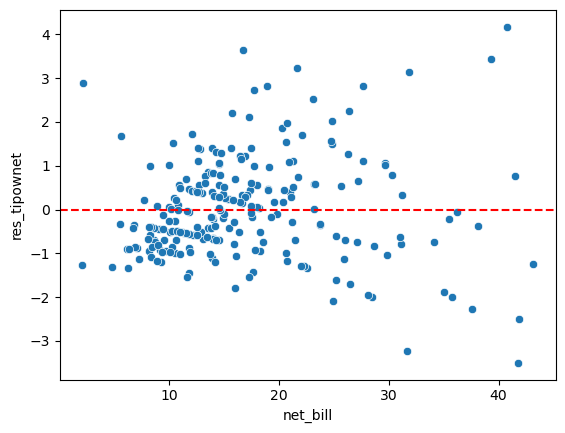

In [188]:
reg_tipownet = smf.ols('tip ~ np.power(net_bill, 2)', data = tips).fit()
tips['res_tipownet'] = reg_tipownet.resid

print(reg_tipownet.summary())

sns.scatterplot(x = 'net_bill', y = 'res_tipownet', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O modelo de polinomio de 2o grau parece novamente ser melhor, devido a dispersão dos residuos no gráfico, apesar de possuir
um R² igual ao do modelo logaritmico. Apresenta-se também melhor que o modelo com o tip sem a escala do log, possuindo um R²
maior.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [189]:
db = pd.read_csv('.\Profissão- Cientista de Dados_M10_support material.csv')
db = db.dropna()
db.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [190]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  re

<Axes: xlabel='tempo_emprego', ylabel='renda'>

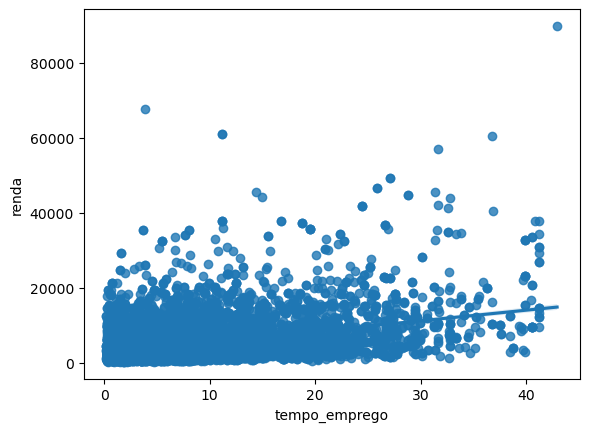

In [191]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = db)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:44:36   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

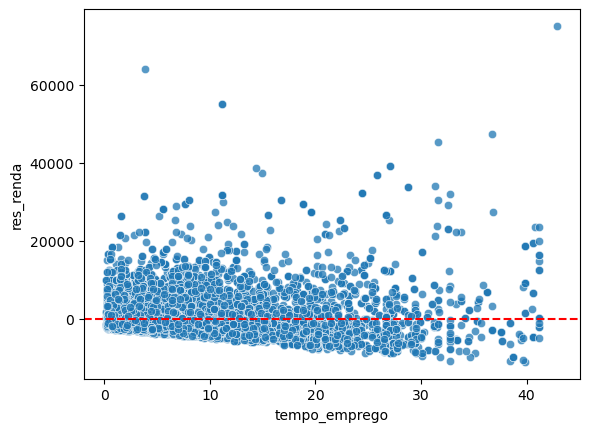

In [192]:
reg = smf.ols('renda ~ tempo_emprego', data = db).fit()
db['res_renda'] = reg.resid
print(reg.summary())


sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = db, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:44:36   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

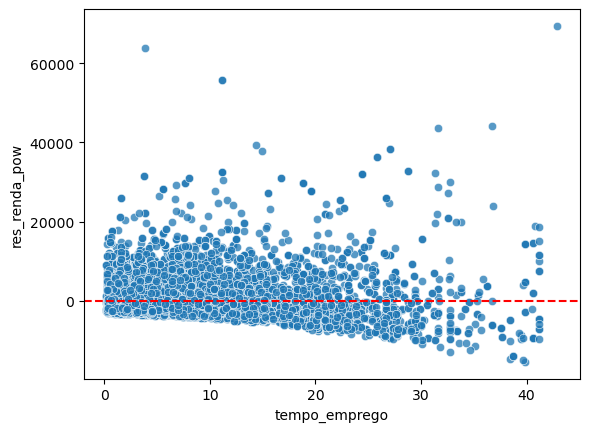

In [193]:
reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2)', data = db).fit()
db['res_renda_pow'] = reg.resid
print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'res_renda_pow', data = db, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [194]:
reg = smf.ols('renda ~ tempo_emprego + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia', data = db).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     406.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:44:36   Log-Likelihood:            -1.2243e+05
No. Observations:               12466   AIC:                         2.449e+05
Df Residuals:                   12459   BIC:                         2.449e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     532.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:44:36   Log-Likelihood:            -1.2234e+05
No. Observations:               12466   AIC:                         2.447e+05
Df Residuals:                   12460   BIC:                         2.447e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

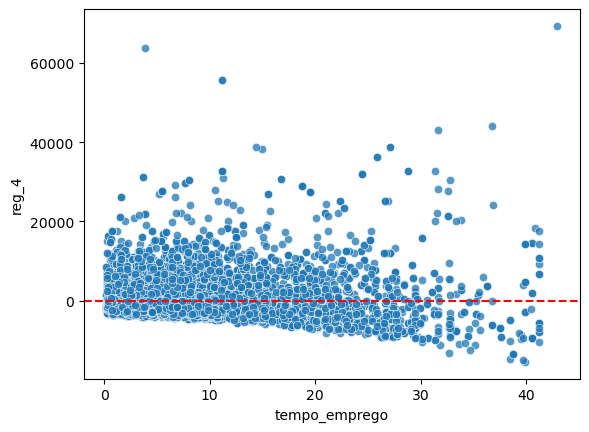

In [195]:
reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2) + posse_de_veiculo + posse_de_imovel + idade', data = db).fit()
db['reg_4'] = reg.resid
print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'reg_4', data = db, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


# Acredito que haja uma dificuldade maior em melhorar este modelo devido a uma presença muito forte de outliers no banco de dados. Identifiquei variáveis que melhoraram meu R² para explicar renda além de tempo_emprego, como  posse_de_veiculo, posse_de_imovel e idade.